# Initial Genetic Algorithm For TSP

## (1) Design a GA with an arbitrary initial design.

In [7]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import csv
import array
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
class TravelingSalesmanProblem:

    def __init__(self, name):
        # initialize instance variables:
        self.name = name
        self.locations = []
        self.distances = []
        self.tspSize = 0

        # initialize the data:
        self.__initData()

    def __len__(self):
        return self.tspSize

    def __initData(self):
        self.__createData()

        # set the problem 'size':
        self.tspSize = len(self.locations)

    def __createData(self):
        self.locations = []

        # open whitespace-delimited file and read lines from it:
        with open(self.name) as f:
            reader = csv.reader(f, delimiter=" ", skipinitialspace=True)

            # skip lines until one of these lines is found:
            for row in reader:
                if row[0] in ('NODE_COORD_SECTION'):
                    break

            # read data lines until 'EOF' found:
            for row in reader:
                if row[0] != 'EOF':
                    # remove index at beginning of line:
                    del row[0]

                    # convert x,y coordinates to ndarray:
                    self.locations.append(np.asarray(row, dtype=np.float32))
                else:
                    break

            # set the problem 'size':
            self.tspSize = len(self.locations)

            # initialize distance matrix by filling it with 0's:
            self.distances = [[0] * self.tspSize for _ in range(self.tspSize)]

            # populate the distance matrix with calculated distances:
            for i in range(self.tspSize):
                for j in range(i + 1, self.tspSize):
                    # calculate euclidean distance between two ndarrays:
                    distance = np.linalg.norm(self.locations[j] - self.locations[i])
                    self.distances[i][j] = distance
                    self.distances[j][i] = distance

    def getTotalDistance(self, indices):
        # distance between th elast and first city:
        distance = self.distances[indices[-1]][indices[0]]

        # add the distance between each pair of consequtive cities:
        for i in range(len(indices) - 1):
            distance += self.distances[indices[i]][indices[i + 1]]

        return distance

    def plotData(self, indices):
        # plot the dots representing the cities:
        plt.scatter(*zip(*self.locations), marker='.', color='red')

        # create a list of the corresponding city locations:
        locs = [self.locations[i] for i in indices]
        locs.append(locs[0])

        # plot a line between each pair of consequtive cities:
        plt.plot(*zip(*locs), linestyle='-', color='blue')

        return plt


### Read data and set up GA parameters

In [9]:
toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation - compute the total distance of the list of cities represented by indices:
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),  # return a tuple


toolbox.register("evaluate", tpsDistance)


# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))

C:\Users\flynn\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\flynn\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### GA Main()

In [10]:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, verbose=False)


    # plot statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    # show both plots:
    plt.show()


## First run through given TSP with 200 Cities, 200 Pop

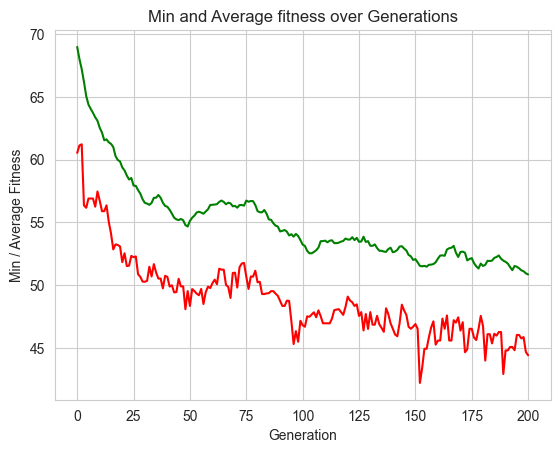

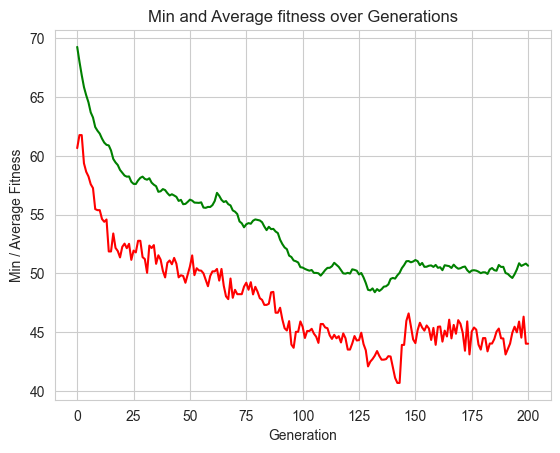

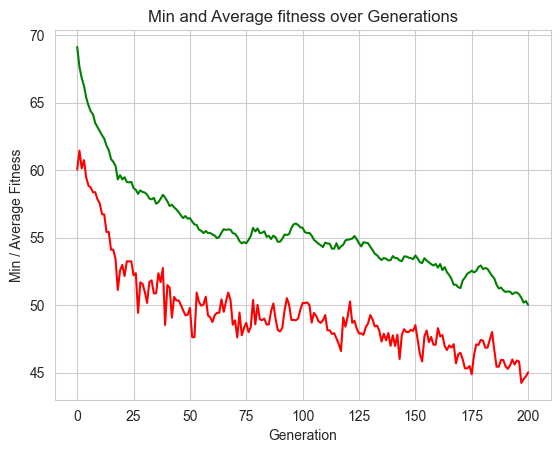

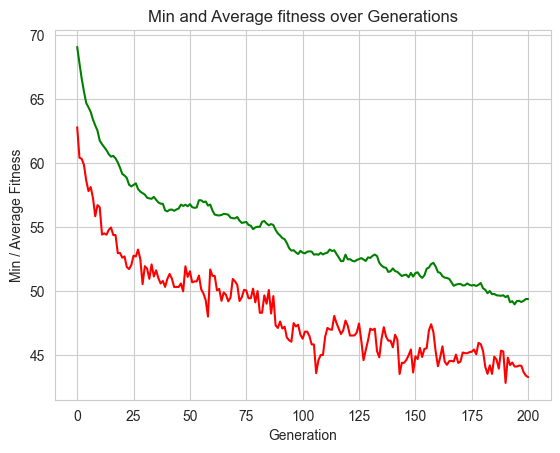

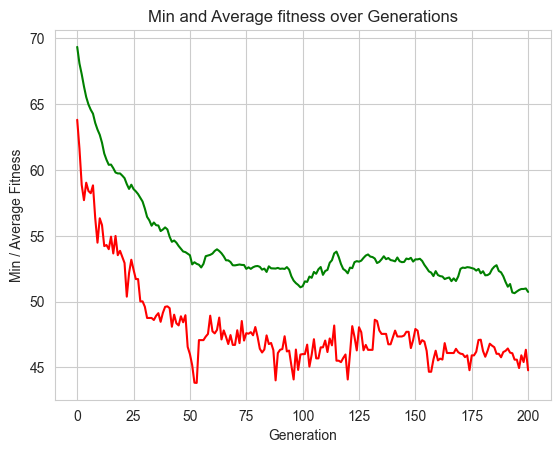

KeyboardInterrupt: 

In [11]:
TSP_NAME = "d200-11.tsp"  # name of problem with 200 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 200
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual

#Run 10 times
for i in range(10):
    main()

## (2) Use the first 50 cities and use a population size of 50 while keeping other GA parameters the same as in (1).

In [ ]:
TSP_NAME = "d50-11.tsp"  # name of problem with 50 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual

#Run 10 times
for i in range(10):
    main()

## (3) Experiment by modifying one or more parameters

In [ ]:
TSP_NAME = "d50-11.tsp"  # name of problem with 50 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.5  # probability for crossover
P_MUTATION = 0.2   # probability for mutating an individual

#Run 10 times
for i in range(10):
    main()

## (4) Base on the results from (2) and (3), decide on a suitable set of parameters for 50 cities.

In [ ]:
TSP_NAME = "d50-11.tsp"  # name of problem with 50 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.5  # probability for crossover
P_MUTATION = 0.2   # probability for mutating an individual

#Run 10 times
for i in range(10):
    main()

# (5) Experiment with different parent selection mechanisms and compare the results of 10 runs each.
Which selection policy works better? Keep this policy for later experiments
Do the same comparison with different crossover and mutation mechanisms

In [ ]:
# Change in Tournament Size

# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize = 100) #Parent Selection
toolbox.register("mate", tools.cxOrdered) #Crossover mechanism Changed to TwoPoint Selection
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp)) #Mutation Mechanism

TSP_NAME = "d50-11.tsp"  # name of problem with 50 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.2
P_MUTATION = 0.5

for i in range(10):
    main()

In [ ]:
#Changed Tournament selection to roulette selection

# Genetic operators:
toolbox.register("select", tools.selRoulette) #Parent Selection changed to roulette
toolbox.register("mate", tools.cxOrdered) #Crossover mechanism
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp)) #Mutation Mechanism

TSP_NAME = "d50-11.tsp"  # name of problem with 50 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.2  # probability for crossover
P_MUTATION = 0.5   # probability for mutating an individual

for i in range(10):
    main()

In [ ]:
#Crossover mechanism changed to 1-Point

# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize = 2) #Parent Selection
toolbox.register("mate", tools.cxOnePoint) #Crossover mechanism Changed to OnePoint Selection
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp)) #Mutation Mechanism

TSP_NAME = "d50-11.tsp"  # name of problem with 50 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.2  # probability for crossover----------------------CHANGED
P_MUTATION = 0.5   # probability for mutating an individual---------------------- CHANGED

for i in range(10):
    main()

In [ ]:
#Crossover mechanism changed to 2-point

toolbox.register("select", tools.selTournament, tournsize = 2) #Parent Selection
toolbox.register("mate", tools.cxTwoPoint) #Crossover mechanism Changed to TwoPoint Selection
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp)) #Mutation Mechanism

TSP_NAME = "d50-11.tsp"  # name of problem with 50 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.2
P_MUTATION = 0.5

for i in range(5):
    main()

In [ ]:
#Mutation mechanism changes

toolbox.register("select", tools.selTournament, tournsize = 2) #Parent Selection
toolbox.register("mate", tools.cxOrdered) #Crossover mechanism
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(tsp)) #Mutation Mechanism Changed to FlitBit Mutation

# create the desired traveling salesman problem instace:
TSP_NAME = "d50-11.tsp"  # name of problem with 50 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.2
P_MUTATION = 0.5

for i in range(5):
    main()

In [ ]:
#Mutation mechanism changes

toolbox.register("select", tools.selTournament, tournsize = 2) #Parent Selection
toolbox.register("mate", tools.cxOrdered) #Crossover mechanism
toolbox.register("mutate", tools.mutFlipBit, indpb=5.0/len(tsp)) #Mutation Mechanism indpb value increased 

# create the desired traveling salesman problem instace:
TSP_NAME = "d50-11.tsp"  # name of problem with 50 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.2
P_MUTATION = 0.5

for i in range(5):
    main()

# (7) Using this new set of parameters and mechanisms obtain the results of 10 runs for the original approx. 200-city TSP.

How do these results compare with what you have obtained in (1)?

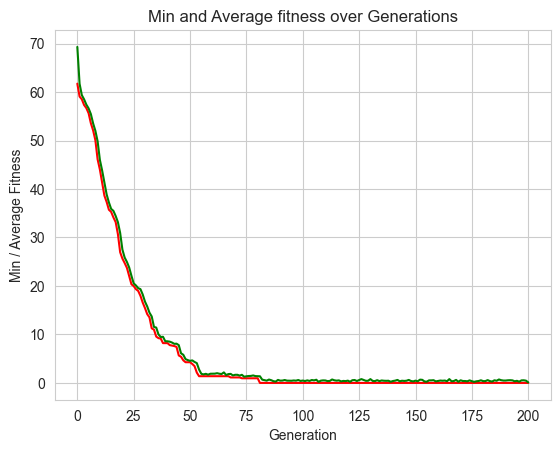

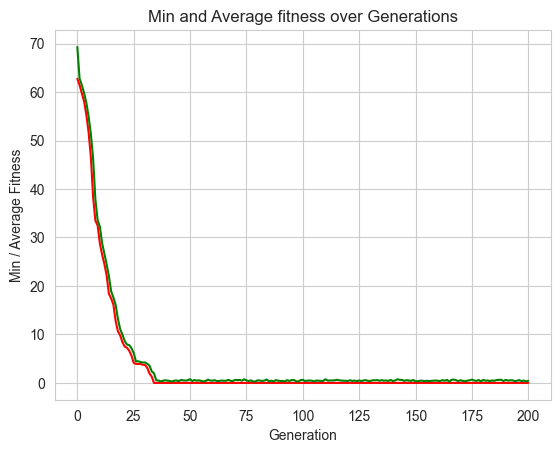

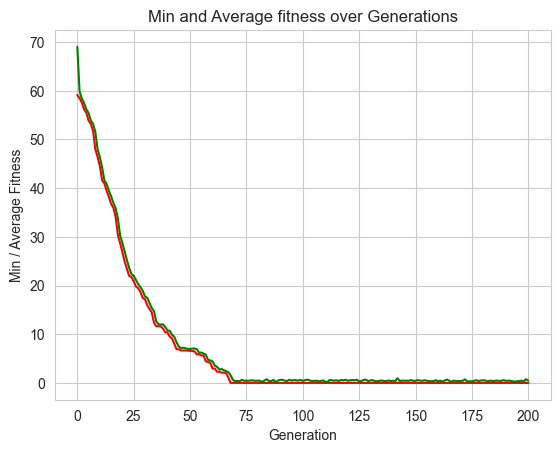

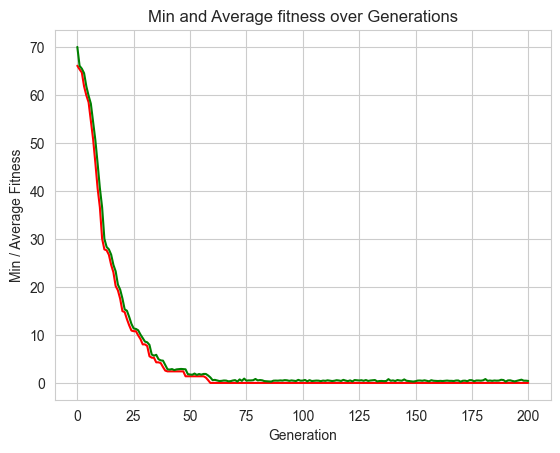

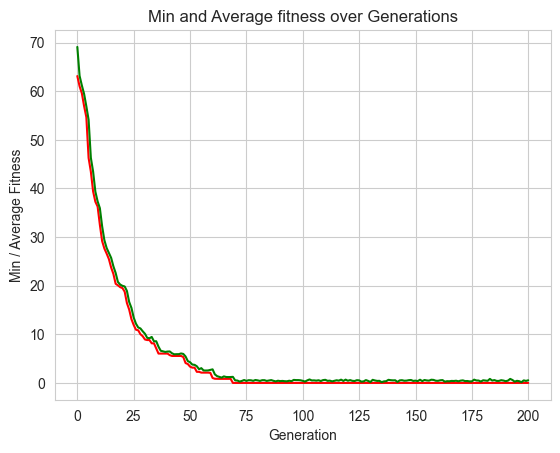

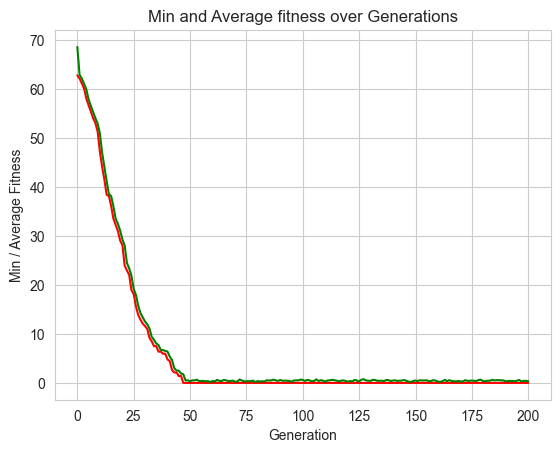

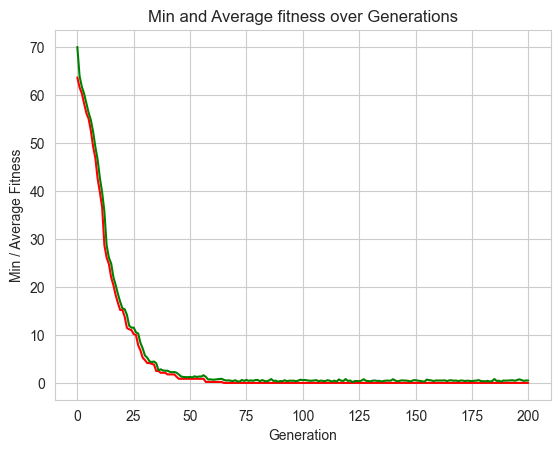

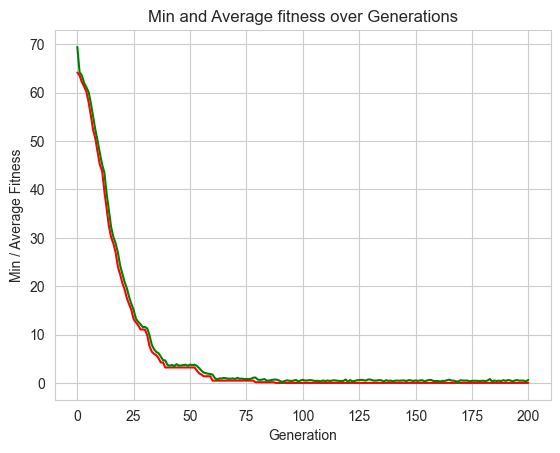

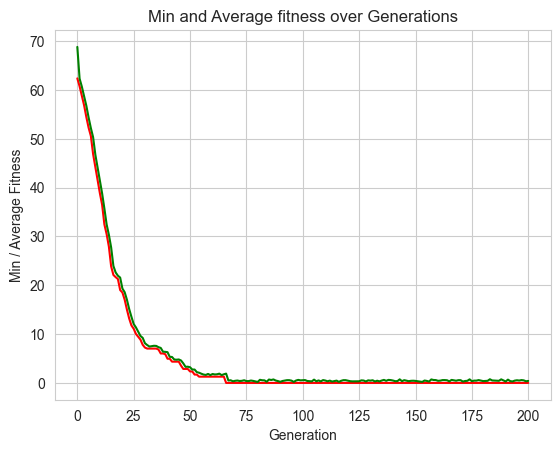

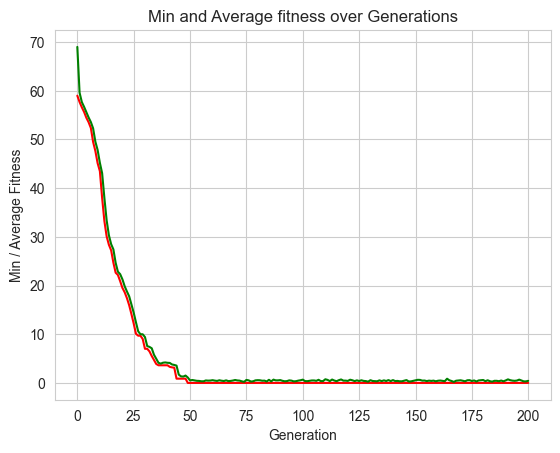

In [13]:
#Final Run Settings

toolbox.register("select", tools.selTournament, tournsize = 100)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutFlipBit, indpb=1/len(tsp))

TSP_NAME = "d200-11.tsp"  # name of problem with 200 cities
tsp = TravelingSalesmanProblem(TSP_NAME)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.2
P_MUTATION = 0.5

for i in range(10):
    main()